In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing

import pylab as pl
import itertools

%matplotlib inline

In [62]:
df = pd.read_csv("car_data.csv")

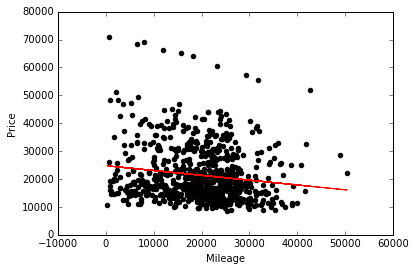

In [68]:
#print(type(df))
#print(df)
xPrice = df["Price"]
yMileage = df[["Mileage"]]

regr = LinearRegression()
regr.fit(yMileage, xPrice)
plt.scatter(yMileage, xPrice, color='black') 
plt.plot(yMileage, regr.predict(yMileage), color='red')
plt.ylabel("Price")

plt.xlabel('Mileage')
plt.show()

In [71]:
# print intercept and coefficients and RScore
#print('RScore', regr.score(xPrice, yMileage))
print('Intercept:            ', regr.intercept_)
print('Coefficient:          ', regr.coef_)


Intercept:             24764.5590061
Coefficient:           [-0.1725205]


# Task 2

In [56]:
features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
price = ["Price"]

X = df[features]
y = df[price]

regr = LinearRegression()
regrtask2 = regr.fit(X, y)

In [57]:
print('R-squared based on Mileage, cylinder,liter etc:      ', regrtask2.score(X,y))

R-squared based on Mileage, cylinder,liter etc:       0.446264353673


# Task 3

In [ ]:
# find the best combination?
combos = []
#from itertools import combinations
   
for i in range(1, 8):
    combos.append(itertools.combinations(features, i))    

check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        pricex = df[groupx]
        degrees = 9
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
            model = model.fit(X,y)
            model_score = model.score(X,y)
        if check_score < model.score(X, y):
            check_score = model.score(X,y)
            max_group = group
            best_degree = degree
            
print(degree, max_group, check_score)